In [2]:
from preprocess import get_prepared_data

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP
import matplotlib.pyplot as plt
import seaborn as sns

/Users/igorjakus/projects/neurohackathon/venv/lib/python3.12/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [4]:
X, y = get_prepared_data(shuffle=True, oversample=True)

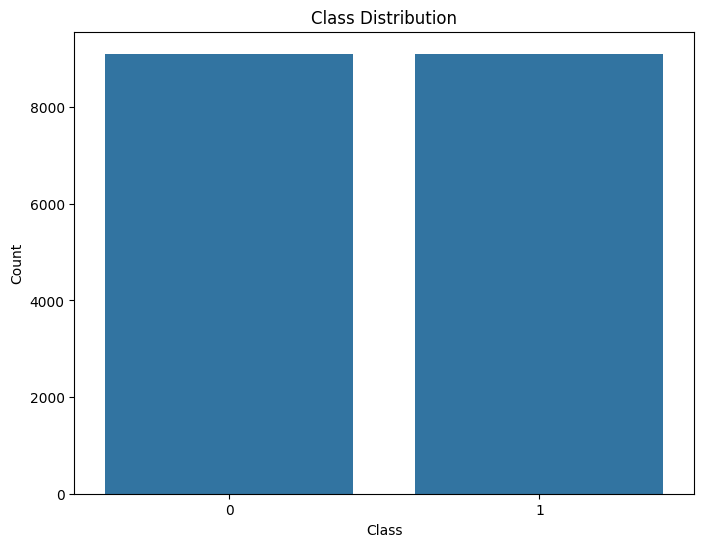

In [11]:
# Plot class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Second Principal Component')

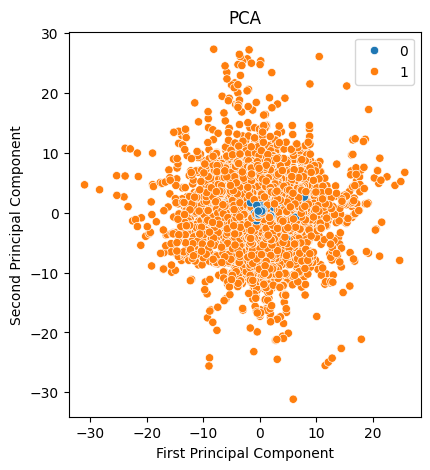

In [12]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 5))
plt.subplot(121)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y)
plt.title('PCA')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

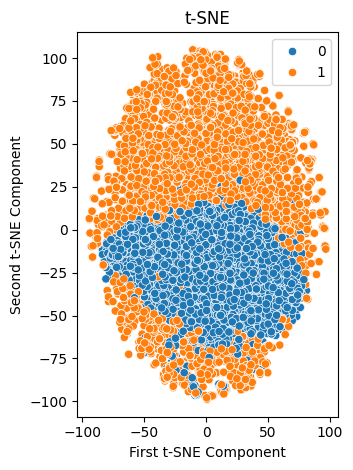

In [13]:
# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.subplot(122)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y)
plt.title('t-SNE')
plt.xlabel('First t-SNE Component')
plt.ylabel('Second t-SNE Component')
plt.tight_layout()
plt.show()

/Users/igorjakus/projects/neurohackathon/venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Text(0, 0.5, 'Second UMAP Component')

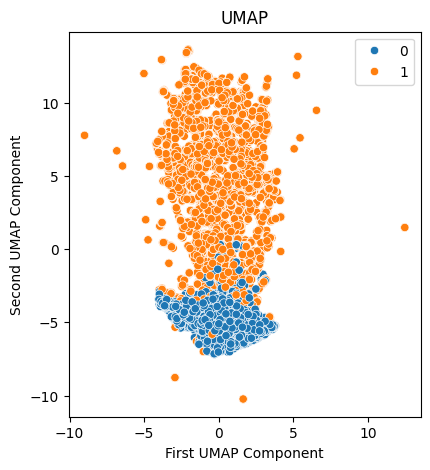

In [6]:
# UMAP
umap = UMAP(n_components=2, random_state=42)
X_umap = umap.fit_transform(X)

plt.figure(figsize=(10, 5))

plt.subplot(121)
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y)
plt.title('UMAP')
plt.xlabel('First UMAP Component')
plt.ylabel('Second UMAP Component')